# Autoregressive Moving Average (ARMA): Sunspots data

In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [3]:
from statsmodels.graphics.api import qqplot

## Sunpots Data

In [4]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [5]:
dta = sm.datasets.sunspots.load_pandas().data

In [6]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

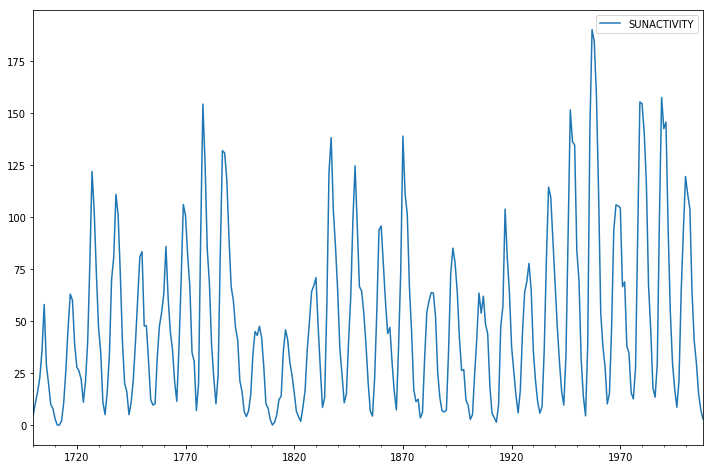

In [7]:
dta.plot(figsize=(12,8));

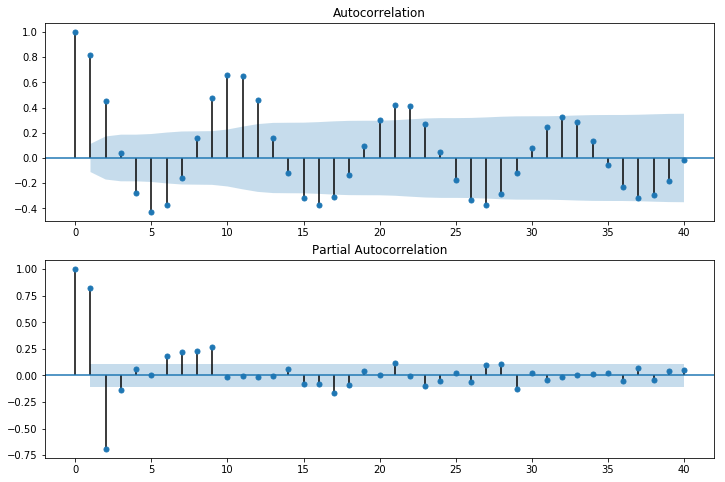

In [8]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

In [9]:
arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit(disp=False)
print(arma_mod20.params)

const                49.659443
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64


/home/jq/local/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
/home/jq/local/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


In [11]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

2622.6363380639186 2637.5697031715094 2628.6067259091647


In [10]:
arma_mod30 = sm.tsa.ARMA(dta, (3,0)).fit(disp=False)

/home/jq/local/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


In [12]:
print(arma_mod30.params)

const                49.749919
ar.L1.SUNACTIVITY     1.300810
ar.L2.SUNACTIVITY    -0.508093
ar.L3.SUNACTIVITY    -0.129650
dtype: float64


In [13]:
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

2619.403628696533 2638.0703350810218 2626.8666135030903


* Does our model obey the theory?

In [14]:
sm.stats.durbin_watson(arma_mod30.resid.values)

1.9564810731242965

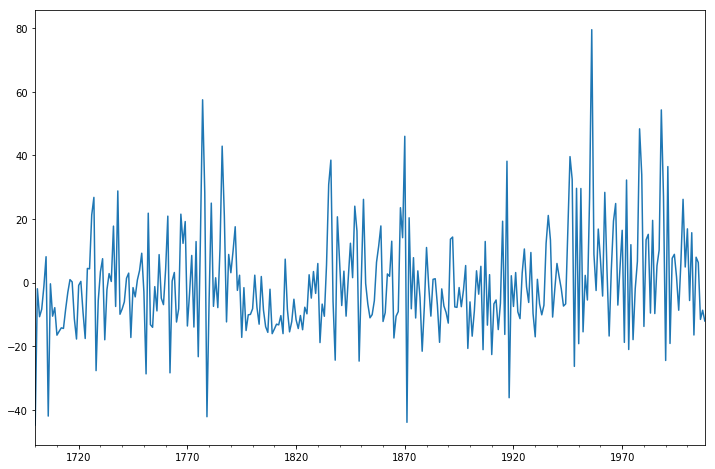

In [15]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);

In [16]:
resid = arma_mod30.resid

In [17]:
stats.normaltest(resid)

NormaltestResult(statistic=49.84499934015612, pvalue=1.5007070337022902e-11)

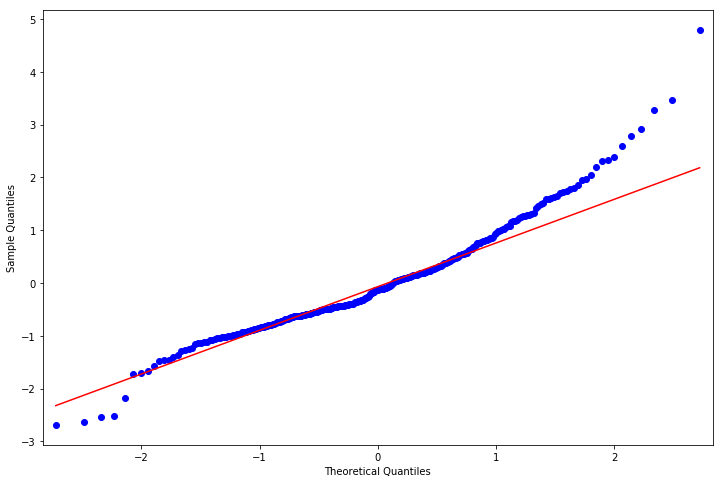

In [18]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

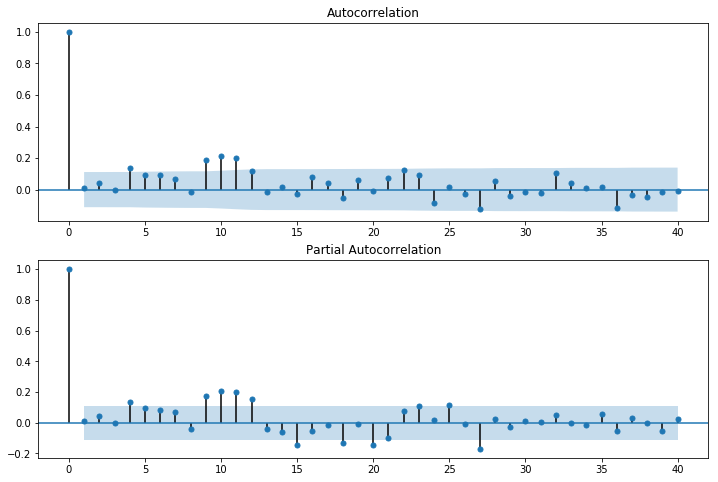

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [20]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), fft=True, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q      Prob(>Q)
lag                                    
1.0   0.009179   0.026286  8.712043e-01
2.0   0.041793   0.573040  7.508721e-01
3.0  -0.001335   0.573599  9.024487e-01
4.0   0.136089   6.408932  1.706196e-01
5.0   0.092468   9.111849  1.046852e-01
6.0   0.091948  11.793273  6.674276e-02
7.0   0.068748  13.297234  6.518911e-02
8.0  -0.015020  13.369261  9.976031e-02
9.0   0.187592  24.641937  3.393875e-03
10.0  0.213718  39.322013  2.229457e-05
11.0  0.201082  52.361148  2.344939e-07
12.0  0.117182  56.804196  8.574231e-08
13.0 -0.014055  56.868333  1.893896e-07
14.0  0.015398  56.945573  3.997645e-07
15.0 -0.024967  57.149326  7.741448e-07
16.0  0.080916  59.296783  6.872128e-07
17.0  0.041138  59.853754  1.110937e-06
18.0 -0.052021  60.747443  1.548423e-06
19.0  0.062496  62.041706  1.831633e-06
20.0 -0.010302  62.076994  3.381224e-06
21.0  0.074453  63.926665  3.193573e-06
22.0  0.124955  69.154778  8.978332e-07
23.0  0.093162  72.071039  5.799773e-07


* This indicates a lack of fit.

* In-sample dynamic prediction. How good does our model do?

In [21]:
predict_sunspots = arma_mod30.predict('1990', '2012', dynamic=True)
print(predict_sunspots)

1990-12-31    167.047418
1991-12-31    140.992997
1992-12-31     94.859096
1993-12-31     46.860866
1994-12-31     11.242536
1995-12-31     -4.721348
1996-12-31     -1.166961
1997-12-31     16.185656
1998-12-31     39.021867
1999-12-31     59.449874
2000-12-31     72.170155
2001-12-31     75.376797
2002-12-31     70.436462
2003-12-31     60.731575
2004-12-31     50.201770
2005-12-31     42.075989
2006-12-31     38.114245
2007-12-31     38.454605
2008-12-31     41.963785
2009-12-31     46.869266
2010-12-31     51.423248
2011-12-31     54.399710
2012-12-31     55.321683
Freq: A-DEC, dtype: float64


/home/jq/local/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
/home/jq/local/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:342: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


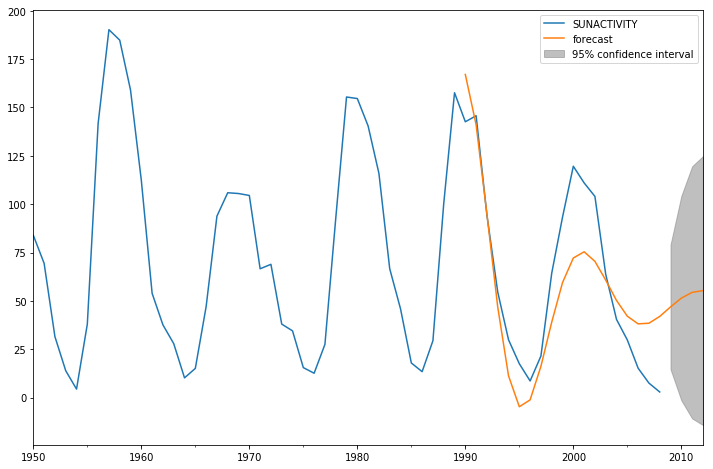

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.loc['1950':].plot(ax=ax)
fig = arma_mod30.plot_predict('1990', '2012', dynamic=True, ax=ax, plot_insample=False)

In [23]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

In [24]:
mean_forecast_err(dta.SUNACTIVITY, predict_sunspots)

5.636979843337933

### Exercise: Can you obtain a better fit for the Sunspots model? (Hint: sm.tsa.AR has a method select_order)

### Simulated ARMA(4,1): Model Identification is Difficult

In [25]:
from statsmodels.tsa.arima_process import ArmaProcess

In [26]:
np.random.seed(1234)
# include zero-th lag
arparams = np.array([1, .75, -.65, -.55, .9])
maparams = np.array([1, .65])

Let's make sure this model is estimable.

In [27]:
arma_t = ArmaProcess(arparams, maparams)

In [28]:
arma_t.isinvertible

True

In [29]:
arma_t.isstationary

False

* What does this mean?

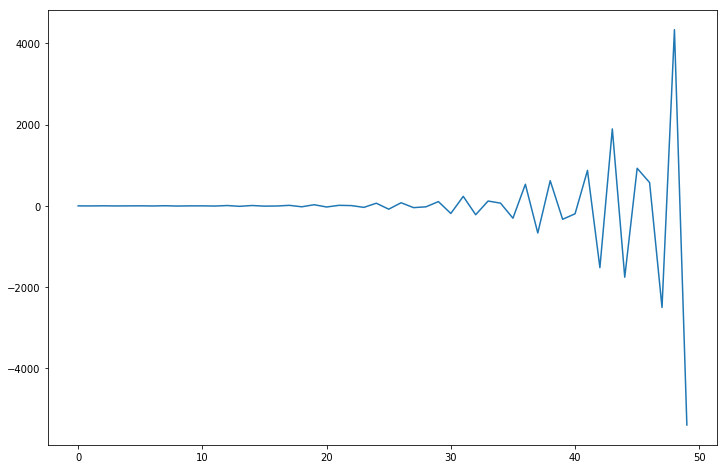

In [30]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(arma_t.generate_sample(nsample=50));

In [31]:
arparams = np.array([1, .35, -.15, .55, .1])
maparams = np.array([1, .65])
arma_t = ArmaProcess(arparams, maparams)
arma_t.isstationary

True

In [32]:
arma_rvs = arma_t.generate_sample(nsample=500, burnin=250, scale=2.5)

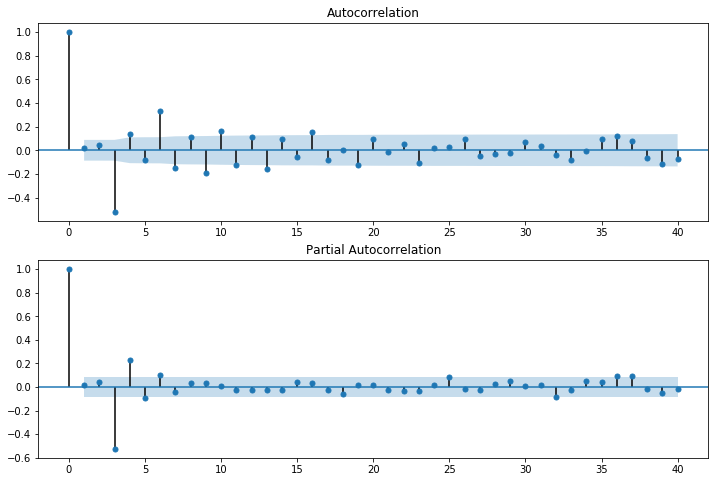

In [33]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arma_rvs, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arma_rvs, lags=40, ax=ax2)

* For mixed ARMA processes the Autocorrelation function is a mixture of exponentials and damped sine waves after (q-p) lags.
* The partial autocorrelation function is a mixture of exponentials and dampened sine waves after (p-q) lags.

In [34]:
arma11 = sm.tsa.ARMA(arma_rvs, (1,1)).fit(disp=False)
resid = arma11.resid
r,q,p = sm.tsa.acf(resid, fft=True, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC           Q      Prob(>Q)
lag                                     
1.0   0.254921   32.687662  1.082220e-08
2.0  -0.172416   47.670722  4.450760e-11
3.0  -0.420945  137.159376  1.548478e-29
4.0  -0.046875  138.271284  6.617760e-29
5.0   0.103240  143.675887  2.958751e-29
6.0   0.214864  167.132981  1.823734e-33
7.0  -0.000889  167.133383  1.009214e-32
8.0  -0.045418  168.185734  3.094863e-32
9.0  -0.061445  170.115785  5.837265e-32
10.0  0.034623  170.729838  1.958753e-31
11.0  0.006351  170.750539  8.267122e-31
12.0 -0.012882  170.835892  3.220259e-30
13.0 -0.053959  172.336529  6.181248e-30
14.0 -0.016606  172.478947  2.160233e-29
15.0  0.051742  173.864470  4.089579e-29
16.0  0.078917  177.094262  3.217964e-29
17.0 -0.001834  177.096010  1.093177e-28
18.0 -0.101604  182.471920  3.103848e-29
19.0 -0.057342  184.187752  4.624107e-29
20.0  0.026975  184.568266  1.235682e-28
21.0  0.062359  186.605944  1.530272e-28
22.0 -0.009400  186.652346  4.548232e-28
23.0 -0.068037  

In [35]:
arma41 = sm.tsa.ARMA(arma_rvs, (4,1)).fit(disp=False)
resid = arma41.resid
r,q,p = sm.tsa.acf(resid, fft=True, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0  -0.007888   0.031300  0.859573
2.0   0.004132   0.039904  0.980246
3.0   0.018103   0.205417  0.976710
4.0  -0.006760   0.228541  0.993948
5.0   0.018120   0.395026  0.995465
6.0   0.050688   1.700448  0.945087
7.0   0.010252   1.753955  0.972196
8.0  -0.011206   1.818017  0.986092
9.0   0.020292   2.028517  0.991009
10.0  0.001029   2.029059  0.996113
11.0 -0.014035   2.130168  0.997984
12.0 -0.023858   2.422925  0.998427
13.0 -0.002108   2.425215  0.999339
14.0 -0.018783   2.607427  0.999590
15.0  0.011316   2.673696  0.999805
16.0  0.042159   3.595419  0.999443
17.0  0.007943   3.628204  0.999734
18.0 -0.074311   6.503853  0.993686
19.0 -0.023379   6.789066  0.995256
20.0  0.002398   6.792072  0.997313
21.0  0.000487   6.792197  0.998516
22.0  0.017953   6.961434  0.999024
23.0 -0.038576   7.744466  0.998744
24.0 -0.029816   8.213249  0.998859
25.0  0.077850  11.415824  0.990675
26.0  0.040408  12.280449  0

### Exercise: How good of in-sample prediction can you do for another series, say, CPI

In [36]:
macrodta = sm.datasets.macrodata.load_pandas().data
macrodta.index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
cpi = macrodta["cpi"]

#### Hint: 

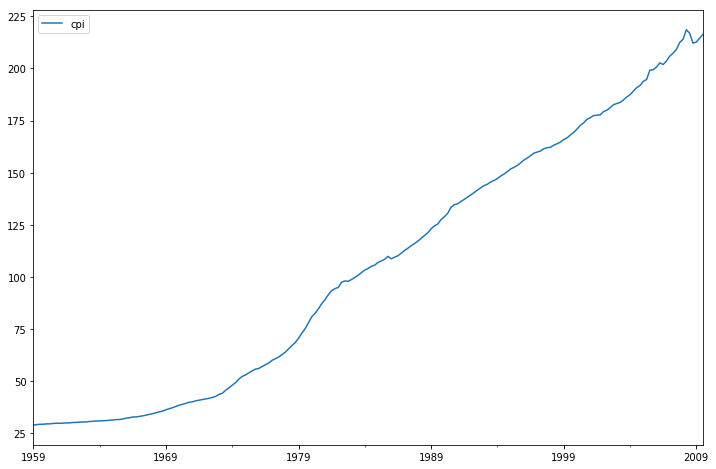

In [37]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = cpi.plot(ax=ax);
ax.legend();

P-value of the unit-root test, resoundingly rejects the null of a unit-root.

In [38]:
print(sm.tsa.adfuller(cpi)[1])

0.9904328188337421
